In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv("Crop_recommendation.csv")

features = data.drop(columns=['crop'])  
target = data['crop'] 

In [3]:
data.shape

(2200, 8)

In [4]:
features.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [5]:
# Counting Uniques
data['crop'].nunique()

22

In [6]:
# Checking for the missing Values
data.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
data.describe()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
# Counting all the unique values in the crop column
print(data['crop'].value_counts())

crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


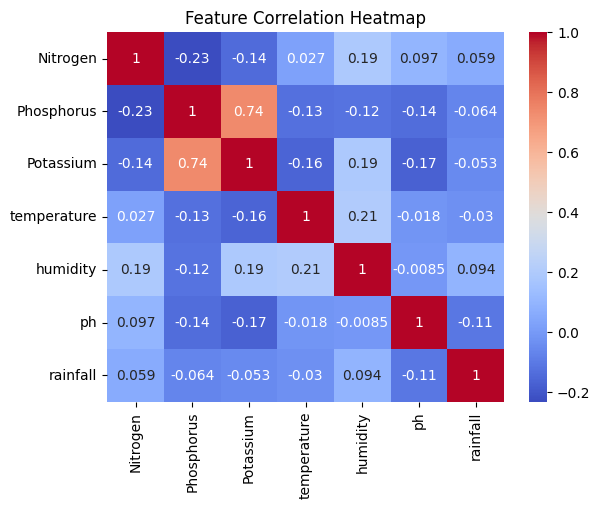

In [10]:
corr = features.corr()  # Compute correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


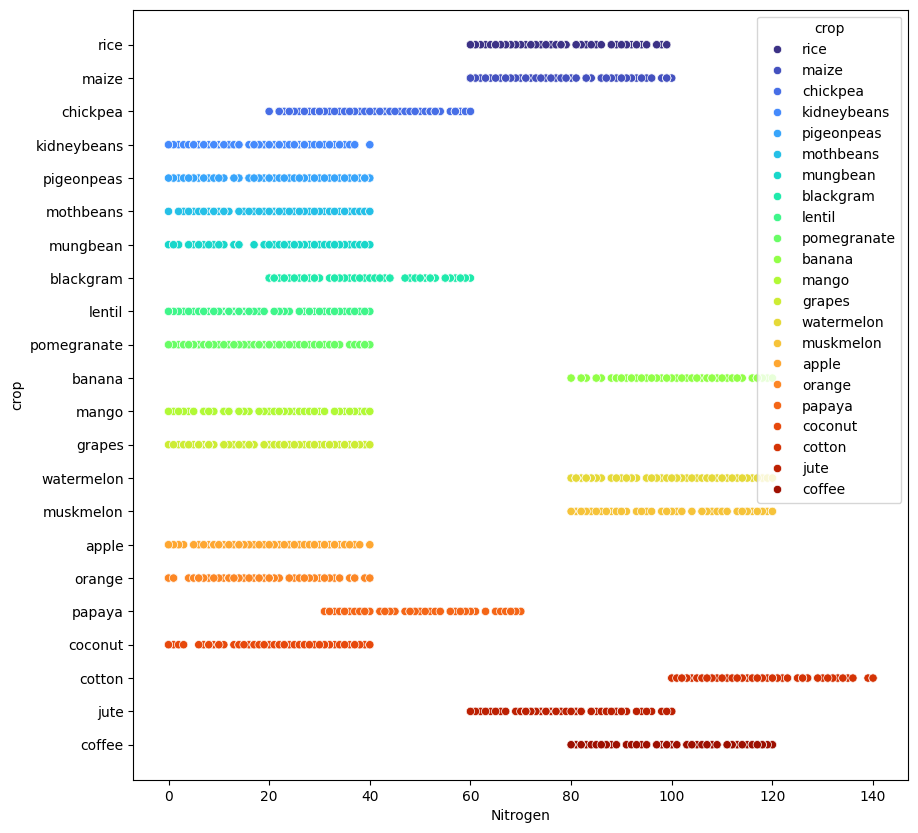

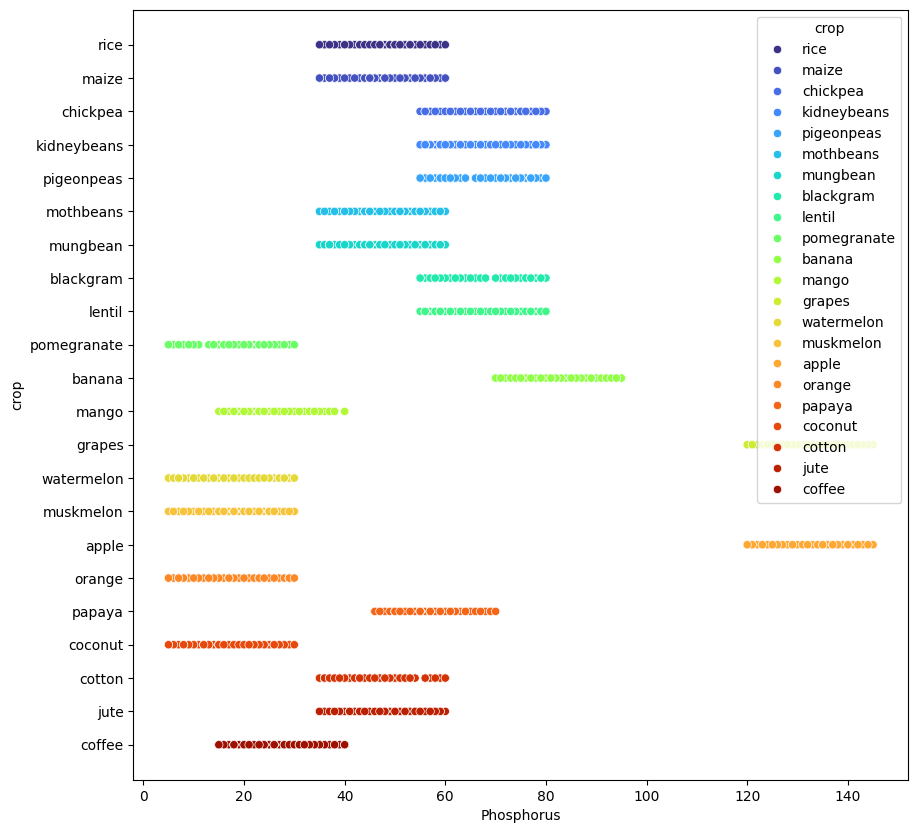

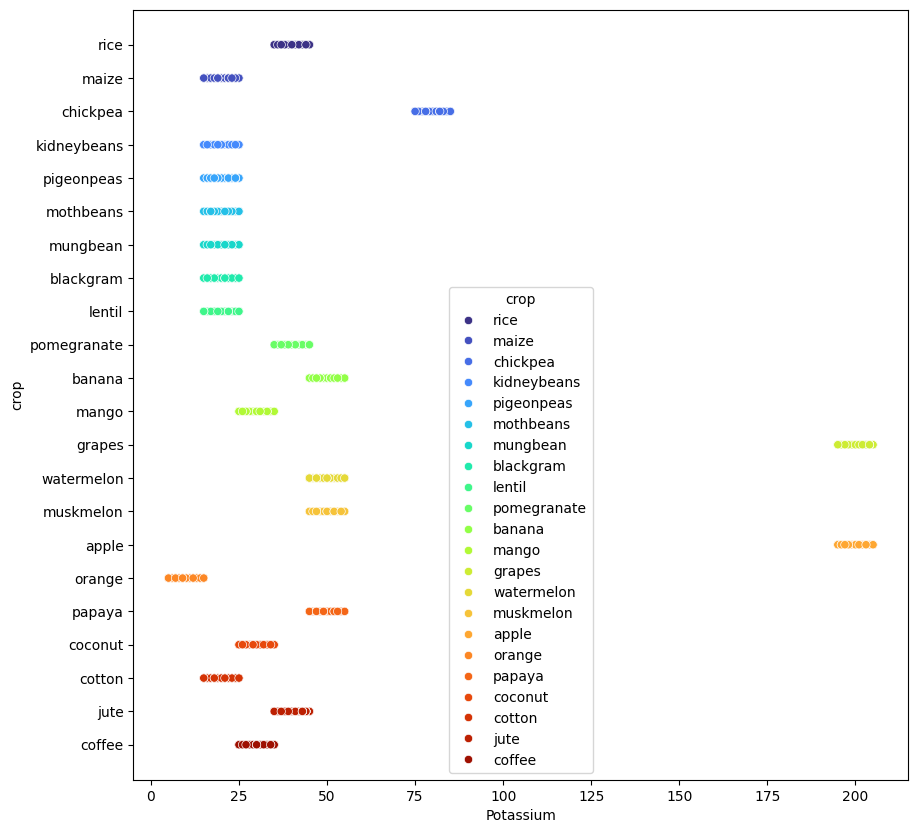

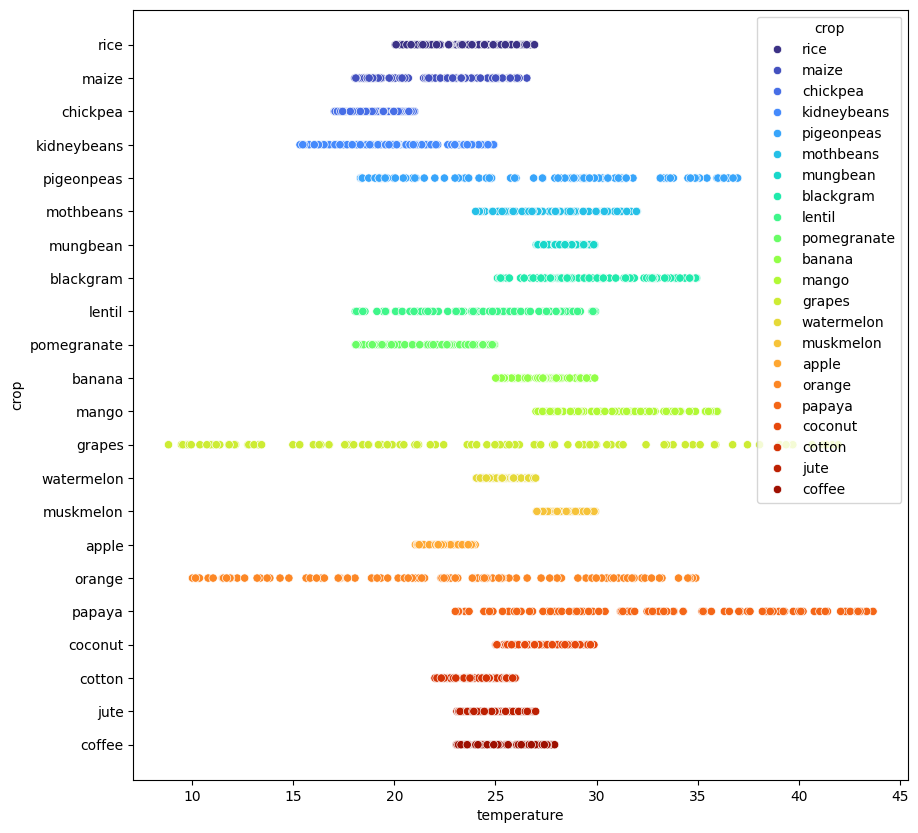

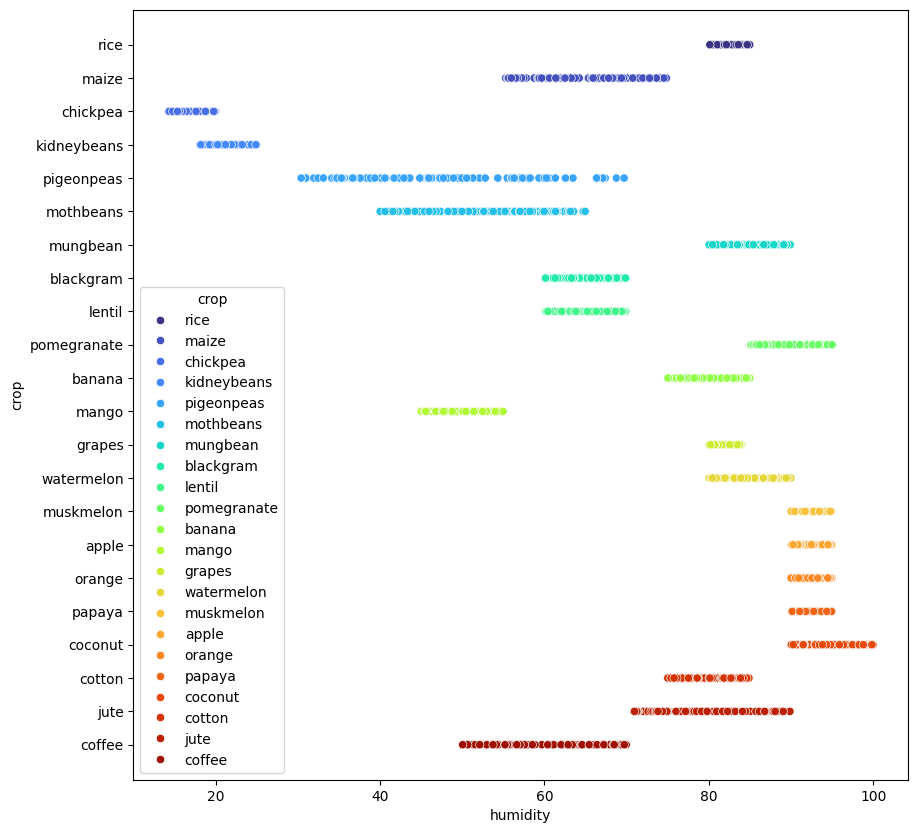

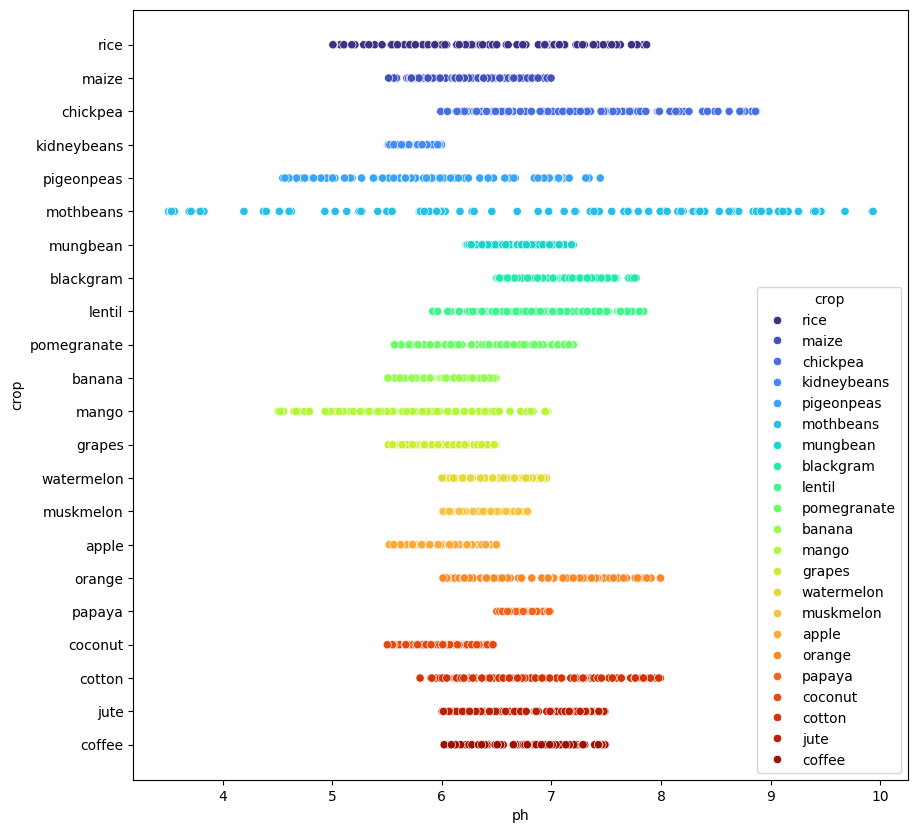

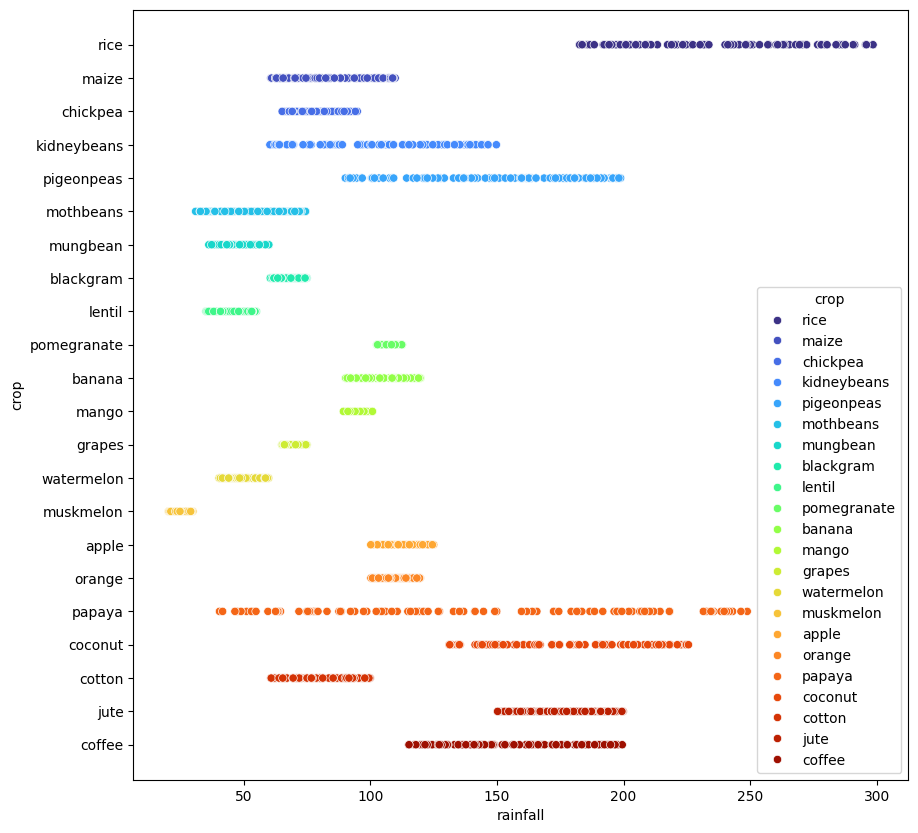

In [11]:
# finding outliners in the data
for feature in features.columns:
    plt.figure(figsize = (10, 10))
    sns.scatterplot(x= feature, y="crop", data = data, hue='crop', palette='turbo')
    plt.show()

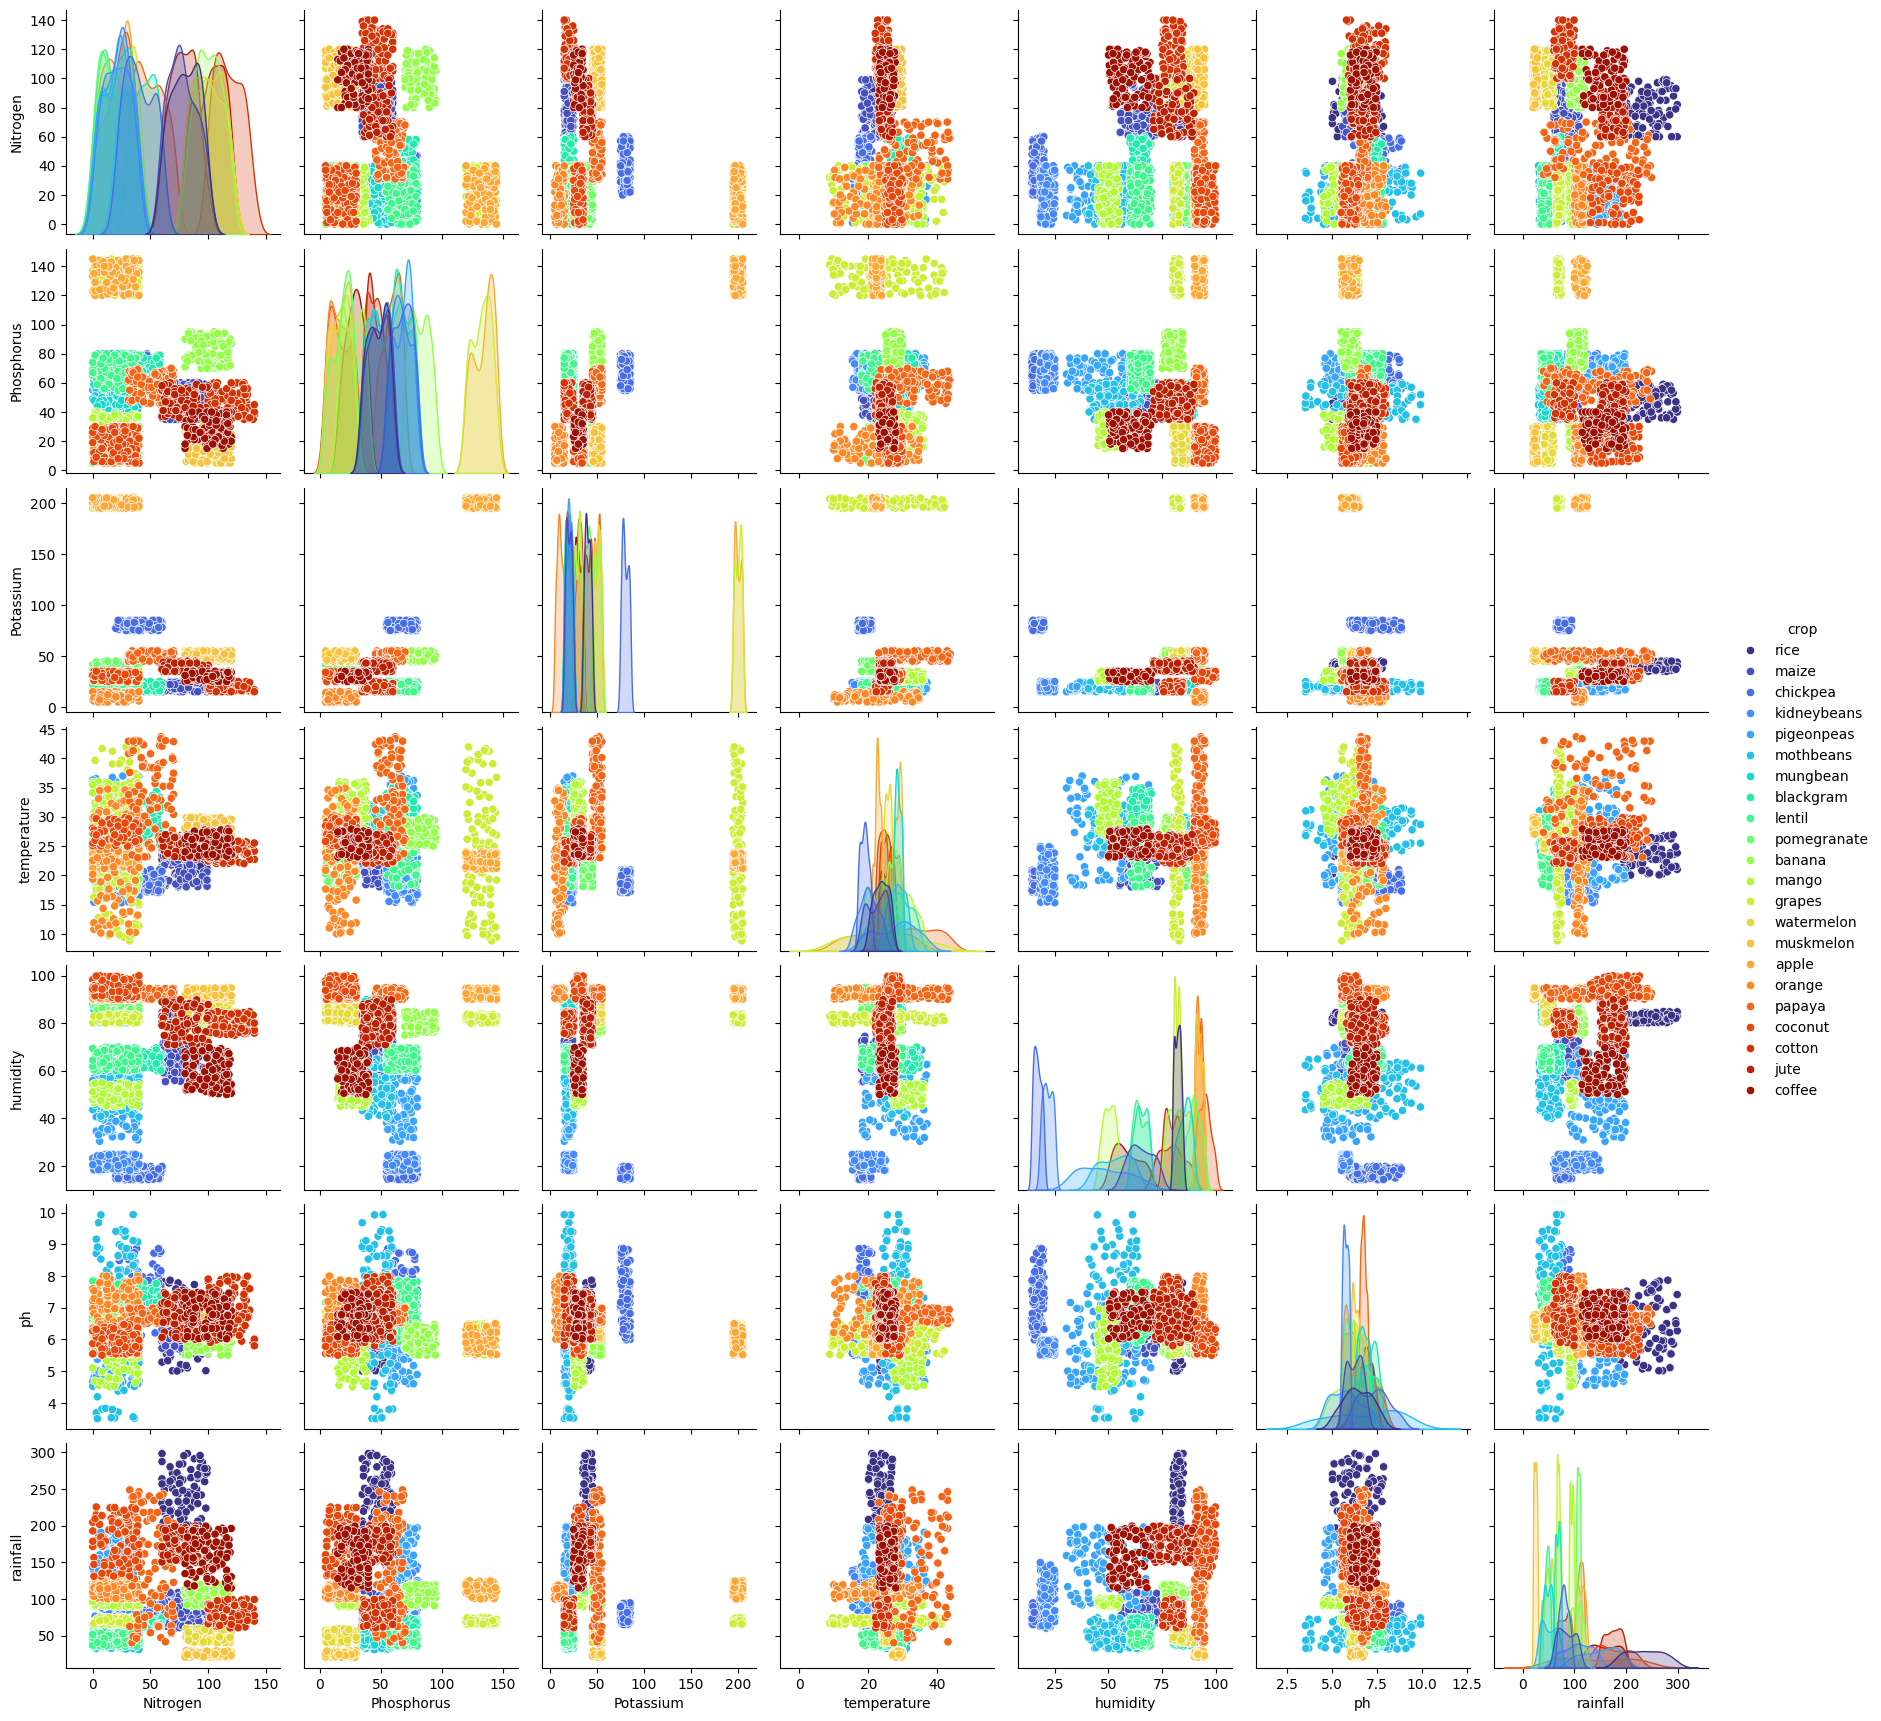

In [12]:
sns.pairplot(data, hue = "crop", palette = "turbo")

<Axes: >

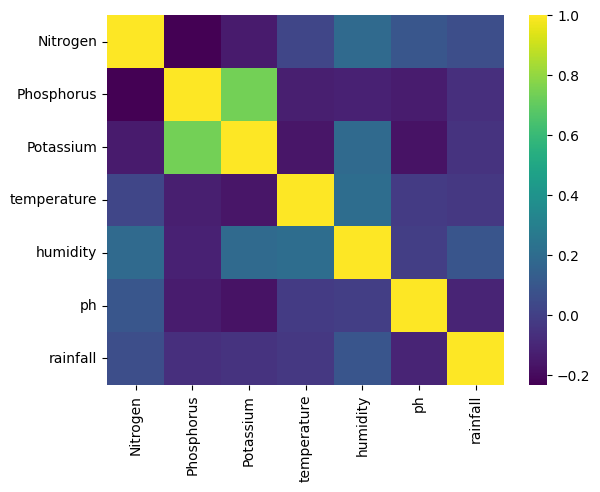

In [13]:
sns.heatmap(features.corr(), cmap='viridis')

In [14]:
# Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.2, random_state=42)

# Applying Scaling to the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from collections import defaultdict

res = defaultdict(float)


**Model Selection**

In [16]:
# Initialize the GradientBoostingClassifier model
gbc = GradientBoostingClassifier()

# Train the model
gbc.fit(x_train, y_train)

# Make predictions on the testing set
pred = gbc.predict(x_test)

# accuracy 
accuracy = accuracy_score(y_test, pred)
print("Accuracy of GradientBoostingClassifier :", accuracy)

#precision 
precision = precision_score(y_test, pred, average='weighted')
print("Precision Score of GradientBoostingClassifier:", precision)

#recall score
recall = recall_score(y_test, pred, average = 'weighted')
print("recall_score of GradientBoostingClassifier:", recall)

#f1_score 
f1 = f1_score(y_test, pred, average = 'weighted')
print("f1_score of GradientBoostingClassifier:", f1)


res[gbc] = f1

Accuracy of GradientBoostingClassifier : 0.9818181818181818
Precision Score of GradientBoostingClassifier: 0.9842712842712842
recall_score of GradientBoostingClassifier: 0.9818181818181818
f1_score of GradientBoostingClassifier: 0.9818514668069125


In [17]:
# Initialize the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

# Train the model
randomforest.fit(x_train, y_train)

# Predict
pred = randomforest.predict(x_test)

# accuracy 
accuracy = accuracy_score(y_test, pred)
print("Accuracy of randomforest :", accuracy)

#precision
precision = precision_score(y_test, pred, average='weighted')
print("Precision Score of randomforest:", precision)

#recall score
recall = recall_score(y_test, pred, average = 'weighted')
print("recall_score of randomforest:", recall)

#f1_score 
f1 = f1_score(y_test, pred, average = 'weighted')
print("f1_score of randomforest:", f1)

res[randomforest] = f1


Accuracy of randomforest : 0.9931818181818182
Precision Score of randomforest: 0.9937348484848485
recall_score of randomforest: 0.9931818181818182
f1_score of randomforest: 0.9931754816901672


In [18]:
# Initialize the SVC model
from sklearn.svm import SVC
svm = SVC()

# Train the model
svm.fit(x_train, y_train)

pred = svm.predict(x_test)

#accuracy
accuracy = accuracy_score(y_test, pred)
print("Accuracy of svm :", accuracy)

#precision 
precision = precision_score(y_test, pred, average='weighted')
print("Precision Score of svm:", precision)

#recall score
recall = recall_score(y_test, pred, average = 'weighted')
print("recall_score of svm:", recall)

#f1_score 
f1 = f1_score(y_test, pred, average = 'weighted')
print("f1_score of svm:", f1)

res[svm] = f1

Accuracy of svm : 0.9681818181818181
Precision Score of svm: 0.9729553106825835
recall_score of svm: 0.9681818181818181
f1_score of svm: 0.9682460195917113


In [19]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()

# Train the model
DecisionTree.fit(x_train, y_train)

pred = DecisionTree.predict(x_test)

# Evaluate the accuracy of model
accuracy = accuracy_score(y_test, pred)
print("Accuracy of DecisionTree:", accuracy)

#precision 
precision = precision_score(y_test, pred, average='weighted')
print("Precision Score of DecisionTree:", precision)

#recall score
recall = recall_score(y_test, pred, average = 'weighted')
print("recall_score of DecisionTree:", recall)

#f1_score 
f1 = f1_score(y_test, pred, average = 'weighted')
print("f1_score of DecisionTree:", f1)

res[DecisionTree] = f1

Accuracy of DecisionTree: 0.9840909090909091
Precision Score of DecisionTree: 0.9845228256591892
recall_score of DecisionTree: 0.9840909090909091
f1_score of DecisionTree: 0.9840886431819624


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Train the model
knn.fit(x_train, y_train)

pred = knn.predict(x_test)

# Evaluate the accuracy of model
accuracy = accuracy_score(y_test, pred)
print("Accuracy of knn:", accuracy)

#precision 
precision = precision_score(y_test, pred, average='weighted')
print("Precision Score of knn:", precision)

#recall score
recall = recall_score(y_test, pred, average = 'weighted')
print("recall_score of knn:", recall)

#f1_score 
f1 = f1_score(y_test, pred, average = 'weighted')
print("f1_score of knn:", f1)

res[knn] = f1

Accuracy of knn: 0.9704545454545455
Precision Score of knn: 0.9751017753290481
recall_score of knn: 0.9704545454545455
f1_score of knn: 0.9705139955182239


In [22]:
best_model = max(res, key=res.get)

In [23]:
import pickle


In [26]:
with open('my_model', 'wb') as f:
    pickle.dump(best_model ,f)
    

In [27]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)